![](https://www.megamillions.com/GLC-Megamillions/media/images/logos/logo_MM_233x110.png)

# Mega Millions
### Drawings are held every Tuesday and Friday evening at 10:12 p.m. CT.

**Mega Millions Odds**

![](https://www.txlottery.org/export/sites/lottery/Images/MegaMillions_Megaplier_Prizechart_enlarged.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt
import seaborn as sns
from pydataset import data
import random
from collections import Counter
plt.rcParams['figure.figsize']=(13,7)

csv_url = 'https://txlottery.org/export/sites/lottery/Games/Mega_Millions/Winning_Numbers/megamillions.csv'
df = pd.read_csv(csv_url)

In [2]:
df

,Mega Millions,12,5,2003,12.1,44,15,18,1,42,4
0,Mega Millions,12,9,2003,14,15,48,4,24,41,4
1,Mega Millions,12,12,2003,16,32,46,9,45,26,4
2,Mega Millions,12,16,2003,47,16,31,24,46,47,3
3,Mega Millions,12,19,2003,5,10,39,17,35,38,3
4,Mega Millions,12,23,2003,2,49,13,21,22,52,4
...,...,...,...,...,...,...,...,...,...,...,...
1782,Mega Millions,1,5,2021,43,20,51,57,55,4,2
1783,Mega Millions,1,8,2021,18,3,58,16,6,11,2
1784,Mega Millions,1,12,2021,28,12,14,26,33,9,2
1785,Mega Millions,1,15,2021,12,43,11,3,38,15,4


In [3]:
data=[]
data.insert(0,{'Mega Millions':'Mega Millions','12':'12','5':'5','2003':'2003','12.1':'12.1','44':'44','15':'15','18':'18','1':'1','42':'42','4':'4'})
df = pd.concat([pd.DataFrame(data),df],ignore_index=True)
df.columns = ['game','month','day','year','N0','N1','N2','N3','N4','BB','MP']

# converting M,D,Y to datetime to adjust for game changes
df['date'] = pd.to_datetime(df[['month','day','year']])

# getting rid of all draws before 10-28-2017 due to game change
df = df[(df['date'] >= '2017-10-28')]

# dropping unnecessary columns 'just the meat and potatoes'
lotto = df.drop(['game','month','day','year','date'],axis=1)
lotto.head()

,N0,N1,N2,N3,N4,BB,MP
1451,31,53,6,28,52,12,4
1452,69,10,61,42,22,3,2
1453,1,68,69,60,54,11,4
1454,6,38,42,23,58,24,2
1455,14,1,21,22,28,19,3


# Number Frequency

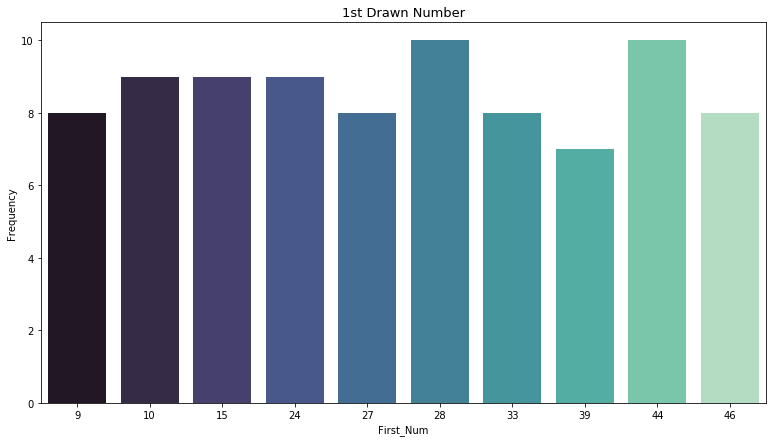

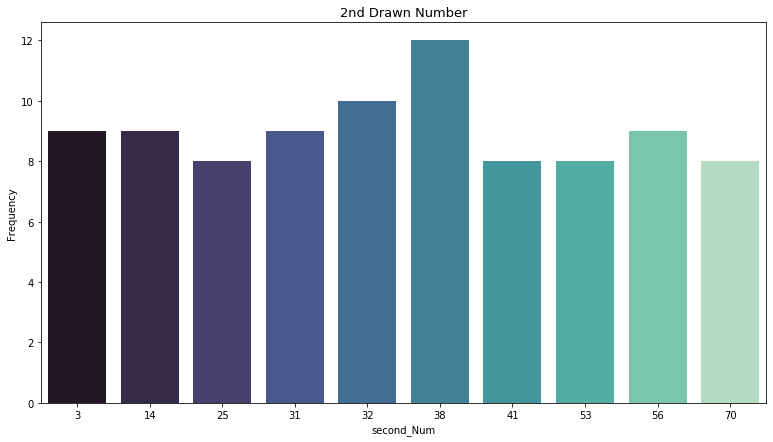

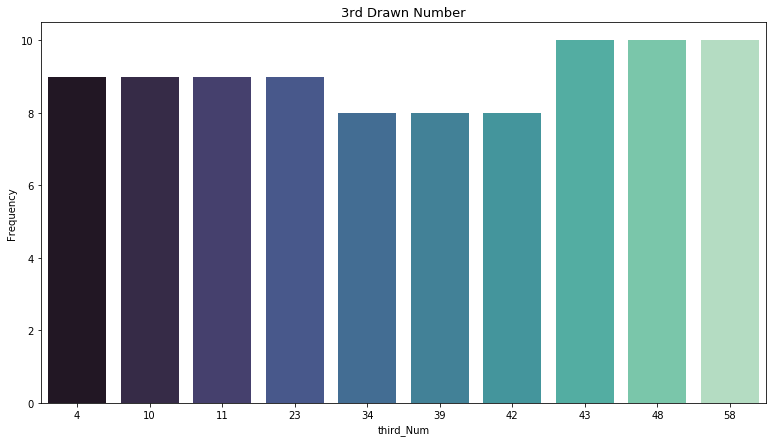

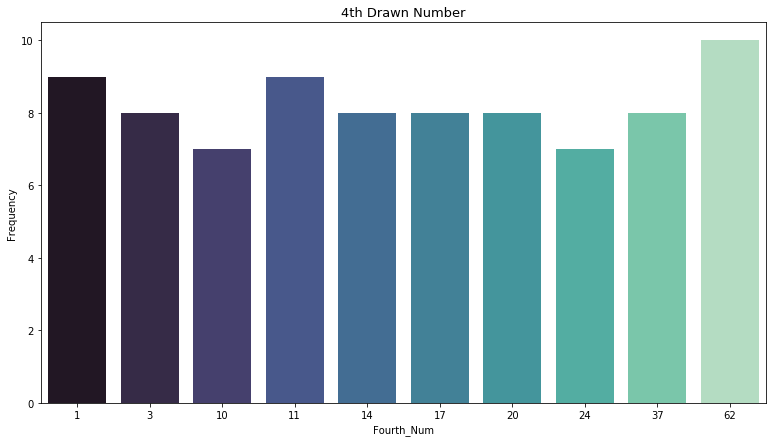

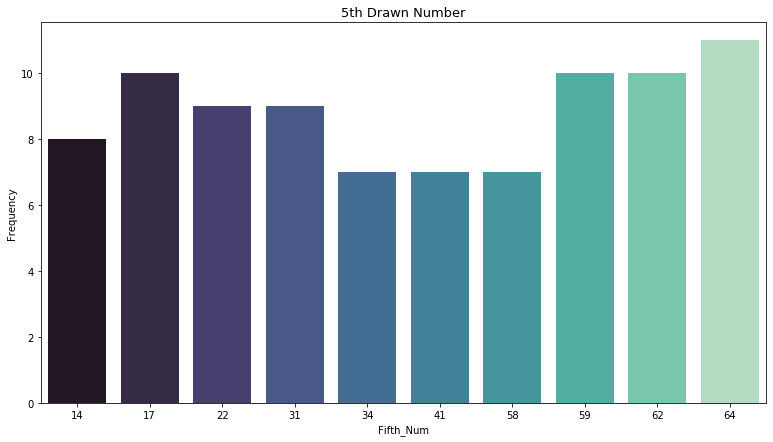

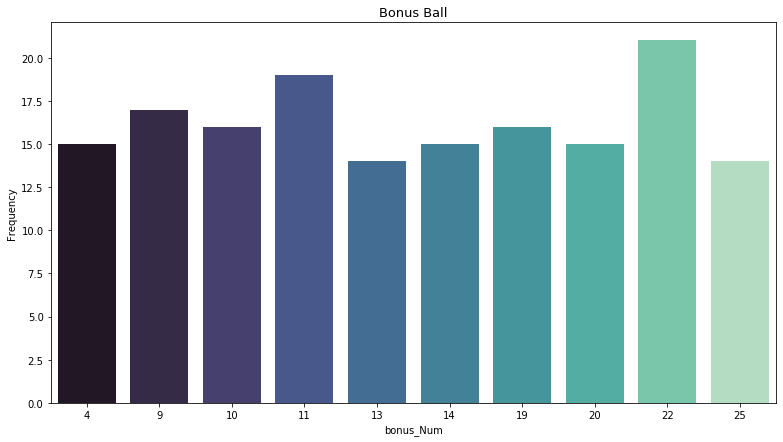

In [35]:
#firsttop5 = lotto.N0.value_counts()
firsttop5 = lotto.N0.value_counts().rename_axis('First_Num').reset_index(name='Frequency').head(10)
sns.barplot(data=firsttop5, x='First_Num', y= 'Frequency', palette = 'mako')
plt.title('1st Drawn Number', fontsize=13)
plt.show()

secondtop5 = lotto.N1.value_counts().rename_axis('second_Num').reset_index(name='Frequency').head(10)
sns.barplot(data=secondtop5, x='second_Num', y= 'Frequency', palette = 'mako')
plt.title('2nd Drawn Number', fontsize=13)
plt.show()

thirdtop5 = lotto.N2.value_counts().rename_axis('third_Num').reset_index(name='Frequency').head(10)
sns.barplot(data=thirdtop5, x='third_Num', y= 'Frequency', palette = 'mako')
plt.title('3rd Drawn Number', fontsize=13)
plt.show()

fourthtop5 = lotto.N3.value_counts().rename_axis('Fourth_Num').reset_index(name='Frequency').head(10)
sns.barplot(data=fourthtop5, x='Fourth_Num', y= 'Frequency', palette = 'mako')
plt.title('4th Drawn Number', fontsize=13)
plt.show()

fifthtop5 = lotto.N4.value_counts().rename_axis('Fifth_Num').reset_index(name='Frequency').head(10)
sns.barplot(data=fifthtop5, x='Fifth_Num', y= 'Frequency', palette = 'mako')
plt.title('5th Drawn Number', fontsize=13)
plt.show()

bonustop5 = lotto.BB.value_counts().rename_axis('bonus_Num').reset_index(name='Frequency').head(10)
sns.barplot(data=bonustop5, x='bonus_Num', y= 'Frequency', palette = 'mako')
plt.title('Bonus Ball', fontsize=13)
plt.show()


# Number Generator

In [31]:
########################################################
########################################################
########################################################

mm = lotto
################# First number
first_column = mm['N0'].tolist()
print('first column count is', len(first_column))

first_num = random.choice(first_column)
print('       ',first_num)

################# Second number

second_column = mm['N1'].tolist()
print('second column count is', len(second_column))

fixed_second = list(filter(lambda x: x != first_num, second_column))
print('fixed second column count is', len(fixed_second))

second_num = random.choice(fixed_second)
print('       ',second_num)

################# Third number

third_column = mm['N2'].tolist()
print('third column count is', len(third_column))

third = list(filter(lambda x: x != first_num, third_column))
fixed_third = list(filter(lambda x: x != second_num, third))
print('fixed third column count is', len(fixed_third))

third_num = random.choice(fixed_third)
print('       ',third_num)

################# Fourth number

fourth_column = mm['N3'].tolist()
print('fourth column count is', len(fourth_column))

four = list(filter(lambda x: x != first_num, fourth_column))
fourth = list(filter(lambda x: x != second_num, four))
fixed_fourth = list(filter(lambda x: x != third_num, fourth))
print('fixed fourth column count is', len(fixed_fourth))

fourth_num = random.choice(fixed_fourth)
print('       ',fourth_num)

################# Fifth number

fifth_column = mm['N4'].tolist()
print('fifth column count is', len(fifth_column))

five = list(filter(lambda x: x != first_num, fifth_column))
fives = list(filter(lambda x: x != second_num, five))
fifth = list(filter(lambda x: x != third_num, fives))
fixed_fifth = list(filter(lambda x: x != fourth_num, fifth))
print('fixed fifth column count is', len(fixed_fifth))

fifth_num = random.choice(fixed_fifth)
print('       ',fifth_num)

################ Bonus Ball

bonus_ball = mm['BB'].tolist()
print('bonus ball count is', len(bonus_ball))

bonus = random.choice(bonus_ball)
print('       ',bonus)

print('')
print(first_num,'-', second_num,'-', third_num,'-', fourth_num,'-', fifth_num,'-', bonus)

first column count is 337
        33
second column count is 337
fixed second column count is 334
        66
third column count is 337
fixed third column count is 326
        34
fourth column count is 337
fixed fourth column count is 321
        1
fifth column count is 337
fixed fifth column count is 316
        31
bonus ball count is 337
        22

33 - 66 - 34 - 1 - 31 - 22


In [34]:
62 in fixed_fourth

True

In [7]:
first_column = mm['N0'].tolist()
print('first column count is', len(first_column))

first_num = random.choice(first_column)
print('       ',first_num)

first column count is 335
        46


In [8]:
second_column = mm['N1'].tolist()
print('second column count is', len(second_column))

fixed_second = list(filter(lambda x: x != first_num, second_column))
print('fixed second column count is', len(fixed_second))

second_num = random.choice(fixed_second)
print('       ',second_num)

second column count is 335
fixed second column count is 329
        56


In [9]:
third_column = mm['N2'].tolist()
print('third column count is', len(third_column))

third = list(filter(lambda x: x != first_num, third_column))
fixed_third = list(filter(lambda x: x != second_num, third))
print('fixed third column count is', len(fixed_third))

third_num = random.choice(fixed_third)
print('       ',third_num)

third column count is 335
fixed third column count is 323
        28


In [10]:
fourth_column = mm['N3'].tolist()
print('fourth column count is', len(fourth_column))

four = list(filter(lambda x: x != first_num, fourth_column))
fourth = list(filter(lambda x: x != second_num, four))
fixed_fourth = list(filter(lambda x: x != third_num, fourth))
print('fixed fourth column count is', len(fixed_fourth))

fourth_num = random.choice(fixed_fourth)
print('       ',fourth_num)

fourth column count is 335
fixed fourth column count is 323
        10


In [18]:
mm[mm['N3'] == 28]

,N0,N1,N2,N3,N4,BB,MP
1451,31,53,6,28,52,12,4
1465,37,39,58,28,42,2,3
1470,70,59,30,28,39,10,3
1702,50,25,60,28,3,1,4


In [29]:
28 in fixed_fourth

False